In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D , MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10

In [15]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train.dtype

dtype('uint8')

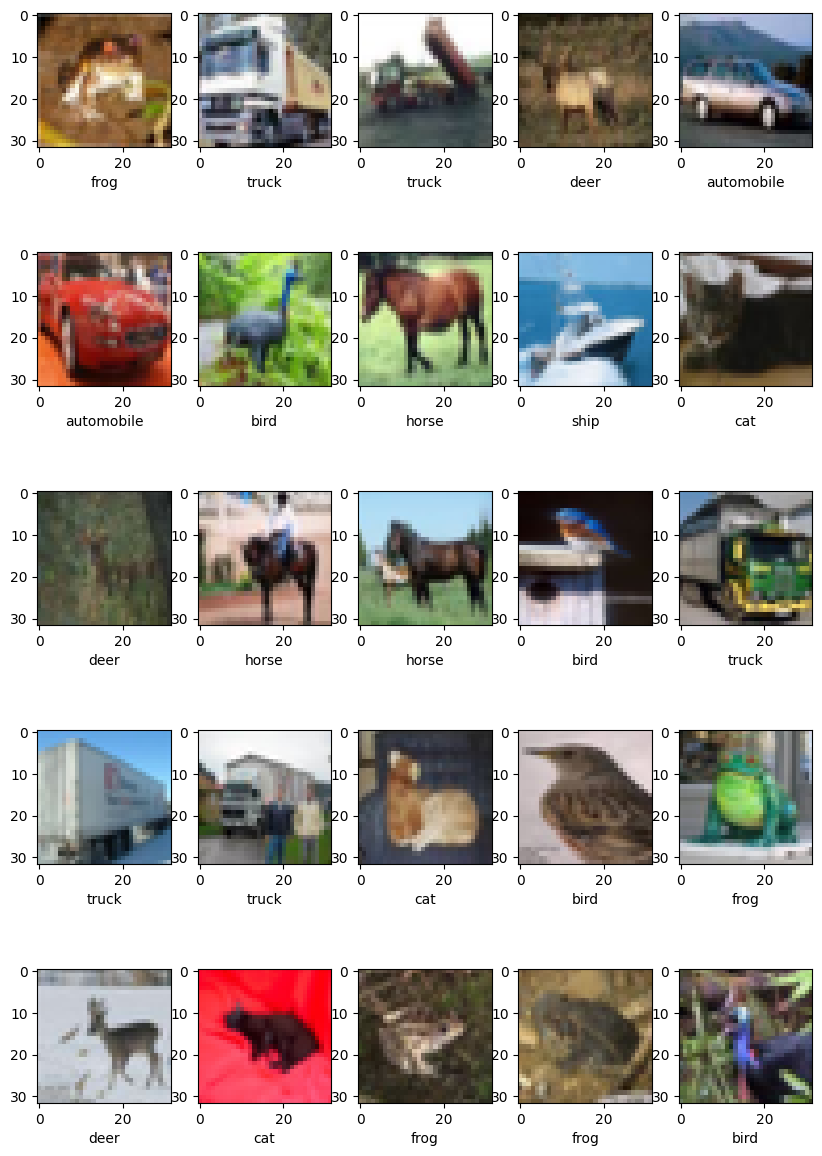

In [17]:
import matplotlib.pyplot as plt
classesName = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(classesName[y_train[i][0]])
plt.show()

In [18]:
y_train = y_train.flatten()
y_train.shape
y_train


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [19]:
import seaborn as sns
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,7))

p = sns.countplot(y_train.flatten())
p.set_xticklabels = classes


Error in callback <function flush_figures at 0x0000025868E2AF20> (for post_execute):


KeyboardInterrupt: 

In [20]:
y_test = y_test.flatten()
y_test.shape

(10000,)

In [22]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],3)
X_train.shape

(50000, 32, 32, 3)

In [23]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [25]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train.shape


(50000, 10)

In [26]:
y_train[1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',activation='relu',input_shape = X_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [32]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [34]:
H = model.fit(X_train,y_train,batch_size=200,epochs=10,verbose = 1)

Epoch 1/10
230/250 [==========================>...] - ETA: 5s - loss: 0.3727 - accuracy: 0.8722

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplot(2,1)
ax[0].plot(H.H['loss'],color = 'b',label = 'Training Loss')
legend = ax[0].legend(loc = 'best',shadow = True)

ax[1].plot(H.H['accuracy'],color = 'b',label = 'Training Accuracy')
legend = ax[1].legend(loc = 'best',shadow = True)



In [ ]:
test_loss , test_acc = model.evaluate(x_test,y_test)

In [ ]:
y_pred = model.preict(X_test)

y_pre_classes = np.argmax(y_pred,axis = 1)

y_true = np.argmax(y_test,axis = 1)

confusion_mtx = tf.math.confusion_matrix(y_true,y_pred_classes)

In [ ]:
plt.figure(figsize=(12,9))
c = sns.heatmap(confusion_mtx,annot = True, fmt = 'g')
c.set(xsticklabels = classes,ysticklabels = classes)